# MVC project: exploration

- This notebook explores data generated by matlab

# 1. Import data

In [115]:
import os
import scipy.io as sio
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
%matplotlib inline

In [116]:
# load data
data_path = '/media/romain/E/Projet_MVC/data/Final_output'
mat = {}
count = 0
for ifile in os.listdir(data_path):
    if ifile.endswith('.mat'):
        name = ifile.split('MVE_Data_')[1].split('.mat')[0]
        mat[name] = {}
        mat[name]['path'] = os.path.join(data_path, ifile)
        mat[name]['data'] = sio.loadmat(mat[name]['path'])
        count += mat[name]['data']['MVE'].shape[0]
        print("project '{}' loaded ({} participants)".format(name, mat[name]['data']['MVE'].shape[0]))
print('\ttotal participants: {}'.format(count))

project 'Sylvain_2015' loaded (10 participants)
project 'Landry_2013' loaded (21 participants)
project 'Landry_2012' loaded (18 participants)
project 'Landry_2015_2' loaded (11 participants)
project 'Yoann_2015' loaded (22 participants)
project 'Landry_2015_1' loaded (14 participants)
project 'Patrick_2013' loaded (16 participants)
	total participants: 112


## Dimensions description
- `mat['data']` contains the `MVE` variable with three dimensions: $\text{participant}(n) \times \text{muscle}(12) \times \text{test}(15)$

In [4]:
# 3d matrix to lists
participants = []
datasets = []
muscles = []
tests = []
relative_mvc = []

for idataset in list(mat.keys()):
    for iparticipant in range(mat[idataset]['data']['MVE'].shape[0]):
        for imuscle in range(mat[idataset]['data']['MVE'].shape[1]):
            max_mvc = np.nanmax(mat[idataset]['data']['MVE'][iparticipant, imuscle, :])
            for itest in range(mat[idataset]['data']['MVE'].shape[2]):
                participants.append(iparticipant+1)
                datasets.append(idataset)
                muscles.append(imuscle+1)
                tests.append(itest+1)
                # normalize mvc (relative to max)
                relative_mvc.append(mat[idataset]['data']['MVE'][iparticipant, imuscle, itest]*100/max_mvc)
                

/home/romain/anaconda3/envs/mvc/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: All-NaN slice encountered
  # This is added back by InteractiveShellApp.init_path()


In [5]:
# lists to single dataframe
df = pd.DataFrame({
    'participant': participants,
    'dataset': datasets,
    'muscle': muscles,
    'test': tests,
    'relative_mvc': relative_mvc,
})
df.head()

,dataset,muscle,participant,relative_mvc,test
0,Sylvain_2015,1,1,100.000000,1
1,Sylvain_2015,1,1,69.322225,2
2,Sylvain_2015,1,1,84.917656,3
3,Sylvain_2015,1,1,80.983069,4
4,Sylvain_2015,1,1,65.163384,5


## Data description

In [96]:
# remove nan
df = df.dropna()
table_1 = df.groupby(['dataset', 'muscle', 'test']).count()
#table_1.reset_index(level='test', drop=True)
#xi = table_1.groupby(['dataset', 'muscle']).nunique()
table_1 = df.groupby(['dataset', 'muscle', 'test']).count()
#table_1.plot(kind='bar')
#sns.barplot(x='muscle', y=)

TypeError: reset_index() got an unexpected keyword argument 'name'

In [120]:
df1 = df.groupby(['dataset','muscle','test']).size().reset_index().drop(['test', 'muscle'], 1)


df1.drop_duplicates()

,dataset,0
0,Landry_2012,18
64,Landry_2013,21
145,Landry_2015_1,14
226,Landry_2015_2,11
262,Patrick_2013,16
442,Sylvain_2015,10
607,Yoann_2015,22


# 2. Datasets Homogeneity


# 3. Overall visualization

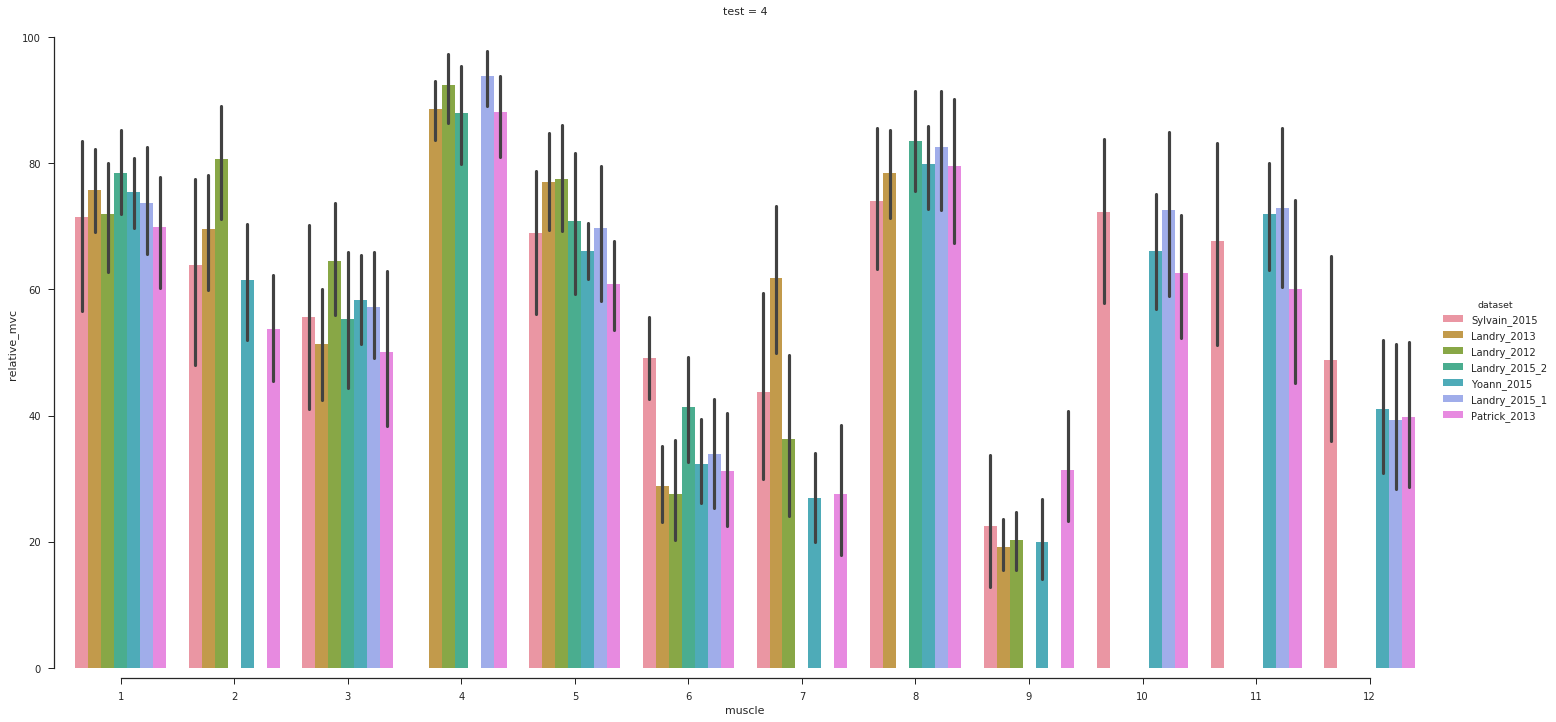

In [6]:
plt.figure(figsize=(45, 10))
#sns.boxplot(x='muscle', y='relative_mvc', hue='dataset', data=df, palette="PRGn")
sns.factorplot(x='muscle', y='relative_mvc',
               hue='dataset', row='test',
               data=df[df.test == 4], kind='bar',
               size=10, aspect=2)
sns.despine(offset=10, trim=True)

ValueError: cannot convert float NaN to integer

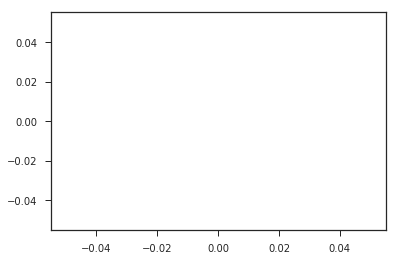

In [7]:
sns.distplot(df.relative_mvc)